# Unconstrained Optimization

Table of contents
<ul>
  <li>1D Search Methods</li>
    <ul>
        <li>1.1. Golden Section Search</li>
        <li>1.2. Fibonacci Search </li>
    </ul>
  <li>2. Gradient Methods
    <ul>
        <li>2.1. Steepest Descent</li>
    </ul>
  </li>
  <li>3. Newton's method</li>
    <li>3.1. Quasi Newton's Method</li>
    <li>3.2. Fibonacci Search </li>
</ul>

## 1D Search Methods



### Golden Section Search
Golden section search considers an interval of a function an tries to find a minimum. The method is unimodal i.e. only one minimum must exist in the interval $[x_{lower};x_{upper}]$ for the optimizer to work. It is an iterative algorithm, that uses the mathematical number $\phi = 0.618$ i.e. the golden ratio to make the search space smaller and smaller.

The iteration distance are defined as:

\begin{align}
    d = (\phi - 1) \cdot (x_{upper}-x_{lower})
\end{align}

New points $[x_{3};x_{4}]$ are evaluated:

\begin{align}
    x_{3} = d + x_{lower} \\
    x_{4} = d - x_{upper}
\end{align}

a 0.3819660112501051
b 0.6180339887498949
1	0.382	-0.4721	61.8034
a 0.2360679774997897
b 0.3819660112501052
2	0.382	-0.4721	38.1966
a 0.38196601125010515
b 0.47213595499957944
3	0.382	-0.4721	23.6068
a 0.32623792124926393
b 0.3819660112501052
4	0.382	-0.4721	14.5898
a 0.38196601125010515
b 0.4164078649987382
5	0.382	-0.4721	9.01699
a 0.36067977499789694
b 0.3819660112501052
6	0.382	-0.4721	5.57281
a 0.38196601125010515
b 0.39512162874653
7	0.3951	-0.4725	3.32951
a 0.39512162874653
b 0.40325224750231337
8	0.3951	-0.4725	2.05775
a 0.3900966300058885
b 0.39512162874653
9	0.3951	-0.4725	1.27176
a 0.39512162874653
b 0.39822724876167187
10	0.3982	-0.4725	0.77986
a 0.39822724876167187
b 0.4001466274871715
11	0.3982	-0.4725	0.48198
a 0.39704100747202964
b 0.39822724876167187
12	0.397	-0.4725	0.29877
a 0.39630787003617224
b 0.39704100747202964
13	0.397	-0.4725	0.18465
a 0.39704100747202964
b 0.39749411132581447
14	0.397	-0.4725	0.11412
a 0.39676097388995707
b 0.39704100747202964
15	0.3968	-0.47

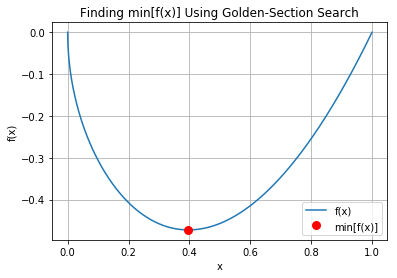

In [8]:
from __future__ import division
from math import *
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

# Golden-section search 
def GSS_iter( xL, xR, es ):
    phi = (1.0 + sqrt(5.0))/2.0
    iter = 1
 
    err = 100.0 # Initial error (%)

    # Print column headers
    # print('{}{}{}{}'.format('Iter.\t','xopt\t','f(xopt)\t','Error'))

    #### It work correctly for max with correct error calculations however not for min.
    #### There is something with the error calc we need to investigate.
    
    # Iterate until termination criterion is reached
    while err > es:

        d = (phi - 1)*(xR - xL)
        a = xR - d
        b = xL + d
        print('a {}'.format(a))
        print('b {}'.format(b))
        if func(b) > func(a):
            xopt = a
            xR = b
        else:
            xopt = b
            xL = a
        err = ((2-phi)*abs((xR - xL)/xopt))*100.0
        # Print iteration, x-optimal, f(x-optimal), %Error 
        print('{}\t{}\t{}\t{}'.format(int(iter), round(xopt, 4), round(func(xopt),4), round(err, 5)))
        iter += 1
    return xopt

# Function to evaluate for max[f(x)]
def func( x ):

    f = x**2 - x**(1/2)

    return f

###############################################
es = 0.001 # Stopping criterion
xL = 0.0 # Initial guesses
xR = 1.0

# Call the iterative solver
xopt = GSS_iter(xL, xR, es)

# Plot equation to check GSS
iter = 0
x = np.linspace(xL, xR, 1000)
f = np.linspace(0, 0,len(x))
for i in range(0, len(x), 1):

     f[i] = func(x[i])

p1, = plt.plot(x, f, label='f(x)')
p2, = plt.plot(xopt, func(xopt),'or',
               label='min[f(x)]', markersize=6, markeredgewidth=3)
plt.title('Finding min[f(x)] Using Golden-Section Search')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='best',
           handler_map={p2: HandlerLine2D(numpoints=1)})
plt.grid(True)
plt.show()

### Fibonacci Search
Improves Golden Search performance by narrowing down the search space.
TBD

### Newton's Method

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [92]:
def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [102]:
f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x
approx = newton(f,Df,1,1e-15,100000)
print('({},{})'.format(approx, f(approx)))

Found solution after 7 iterations.
(1.465571231876768,-4.440892098500626e-16)


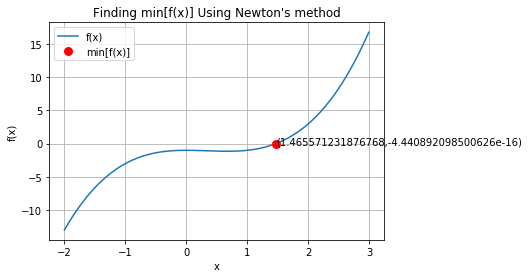

In [109]:
x = np.arange(-2, 3, 0.01)
y = f(x)

fig, ax = plt.subplots()
p1, = ax.plot(x,y, label='f(x)')
p2, = ax.plot(approx, f(approx),'or',
               label='min[f(x)]', markersize=6, markeredgewidth=3)
plt.title('Finding min[f(x)] Using Newton\'s method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='best',
           handler_map={p2: HandlerLine2D(numpoints=1)})
plt.grid(True)
ax.annotate('('+str(approx)+',' + str(f(approx)) + ')', xy=(approx,f(approx)-0.2))
plt.show()

Gradient methods are unconstrained optimization methods based on the gradient of the function.

The gradient of f in $\rm I\!R^{n} \rightarrow \rm I\!R$ is a column vector
\begin{align}
    \nabla f(x) = \begin{bmatrix}
           \frac{\partial x}{\partial x_{1}} \\
           \frac{\partial x}{\partial x_{2}} \\
           \vdots \\
           \frac{\partial x}{\partial x_{n}}
         \end{bmatrix}
\end{align}

The first derivative of f in $\rm I\!R^{n} \rightarrow \rm I\!R$ is a row vector

\begin{align}
    Df(x) = \nabla f(x)^{T} = \begin{bmatrix}
           \frac{\partial x}{\partial x_{1}}
           \frac{\partial x}{\partial x_{2}}
           \dots
           \frac{\partial x}{\partial x_{n}}
         \end{bmatrix}
\end{align}
 
## Gradient Descent 2D


In [115]:
def gradient_descent(previous_x, learning_rate, epoch):
    x_gd = []
    y_gd = []
    
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))

    # begin the loops to update x and y
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x - 4)
        x_gd.append(current_x)
        y_gd.append(func_y(current_x))

        # update previous_x
        previous_x = current_x

    return x_gd, y_gd

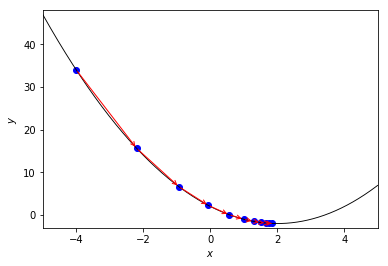

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def func_y(x):
    y = x**2 - 4*x + 2

    return y

# Initialize x0 and learning rate
x0 = -4
learning_rate = 0.15
epoch = 10

# y = x^2 - 4x + 2
x = np.arange(-5, 5, 0.01)
y = func_y(x)

fig, ax = plt.subplots()


ax.plot(x, y, lw = 0.9, color = 'k')
ax.set_xlim([min(x), max(x)])
ax.set_ylim([-3, max(y)+1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

x_gd, y_gd = gradient_descent(x0, learning_rate, epoch)

ax.scatter(x_gd, y_gd, c = 'b')

for i in range(1, epoch+1):
    ax.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

plt.show()

## Gradient Descent (3D)

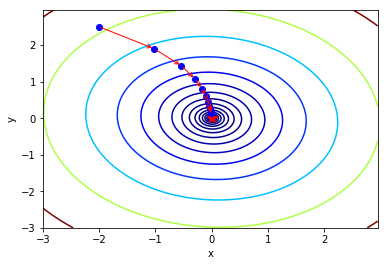

In [38]:
from mpl_toolkits.mplot3d import Axes3D

def func_z(x, y):
    # Calculate values of Z from the created grid
    z = x**2/5. + x*y/50. + y**2/5.

    return z

def gradient_descent(previous_x, previous_y, learning_rate, epoch):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    # begin the loops to update x, y and z
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x/5. +
                                               previous_y/50.)
        x_gd.append(current_x)
        current_y = previous_y - learning_rate*(previous_x/50. +
                                                previous_y/5.)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        # update previous_x and previous_y
        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

x0 = -2
y0 = 2.5
learning_rate = 1.3
epoch = 10

''' Plot our function '''
a = np.arange(-3, 3, 0.05)
b = np.arange(-3, 3, 0.05)

x, y = np.meshgrid(a, b)
z = func_z(x, y)

fig1, ax1 = plt.subplots()

ax1.contour(x, y, z, levels=np.logspace(-3, 3, 25), cmap='jet')
# Plot target (the minimum of the function)
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, func_z(*min_point_), 'r*', markersize=10)
ax1.set_xlabel(r'x')
ax1.set_ylabel(r'y')

x_gd, y_gd, z_gd = gradient_descent(x0, y0, learning_rate, epoch)

ax1.plot(x_gd, y_gd, 'bo')

for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

plt.show()

In [8]:
A = np.matrix([[1, 2, 1],[1,5,0],[1,0,0]])

In [9]:
A

matrix([[1, 2, 1],
        [1, 5, 0],
        [1, 0, 0]])

In [11]:
np.transpose(A)

matrix([[1, 1, 1],
        [2, 5, 0],
        [1, 0, 0]])